In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
import itertools
import numpy as np

# Basic Model

## Data preparation

In [2]:
df = pd.read_csv("../data/prices_scores_clean.csv")
df = df.rename(columns={"Unnamed: 0": "ds","price":"y"})
df['ds'] = pd.to_datetime(df['ds'])
df = df.drop_duplicates().reset_index(drop=True)
basic_df = df.drop(columns=["BTC_score","twitter_score","reddit_score"])

In [3]:
basic_df

,ds,y
0,2018-02-01,9052.5763
1,2018-02-02,8827.6300
2,2018-02-03,9224.3913
3,2018-02-04,8186.6488
4,2018-02-05,6914.2600
...,...,...
1091,2021-01-27,30425.3933
1092,2021-01-28,33420.0450
1093,2021-01-29,34264.0100
1094,2021-01-30,34324.2717


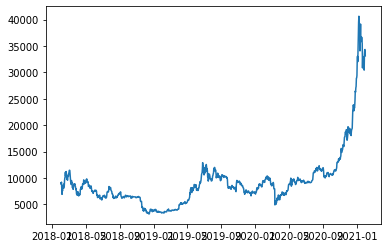

In [4]:
plt.plot(basic_df["ds"],basic_df["y"])

In [5]:
train = basic_df.iloc[:1066]
test = basic_df.iloc[1066:]

In [6]:
train.tail()

,ds,y
1061,2020-12-28,27041.8667
1062,2020-12-29,27353.9783
1063,2020-12-30,28886.0400
1064,2020-12-31,28956.2650
1065,2021-01-01,29391.7750


In [7]:
test.head()

,ds,y
1066,2021-01-02,32198.4800
1067,2021-01-03,33033.6200
1068,2021-01-04,32017.5650
1069,2021-01-05,34035.0067
1070,2021-01-06,36826.9783


In [8]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
horizon = 30
future = model.make_future_dataframe(horizon)
forecast = model.predict(future)

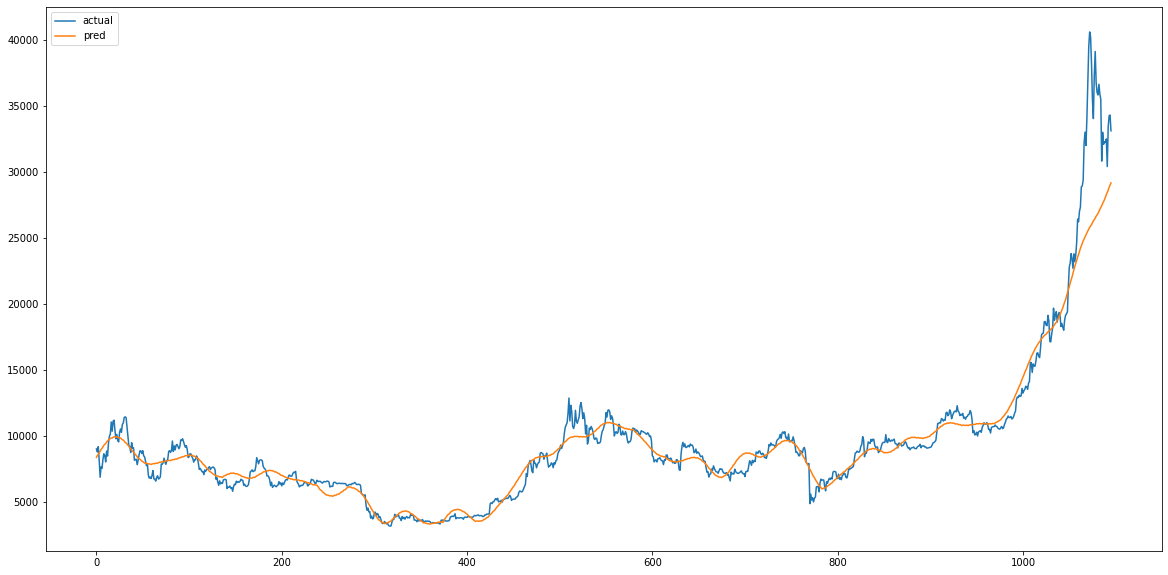

In [10]:
plt.figure(figsize=(20,10))
plt.plot(basic_df["y"], label="actual")
plt.plot(forecast["yhat"], label="pred")
plt.legend()

check here why is there a break from test plot

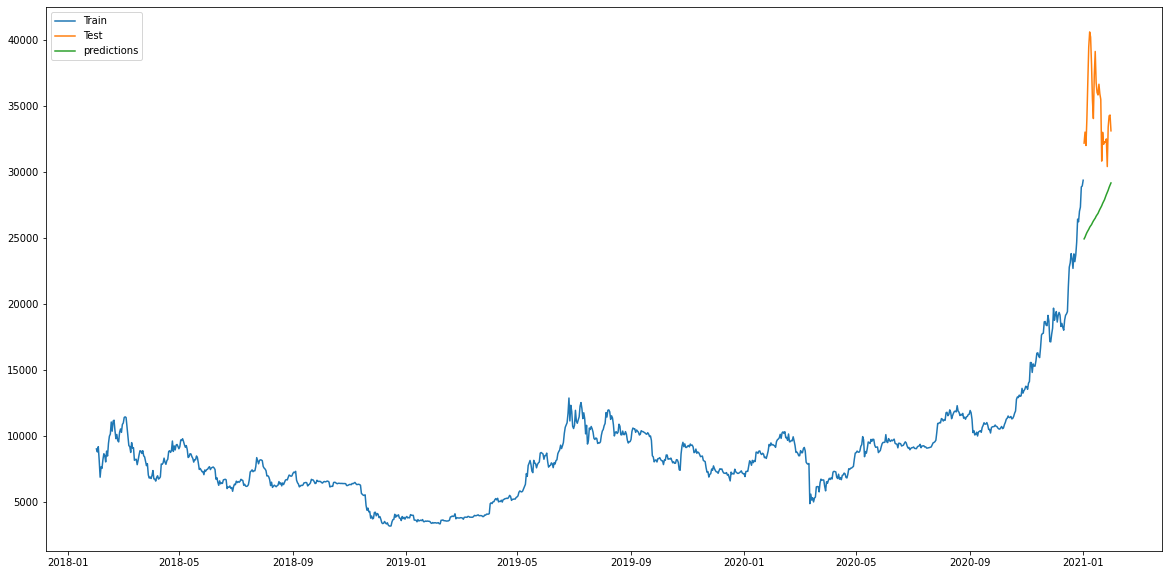

In [11]:
plt.figure(figsize=(20,10))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")

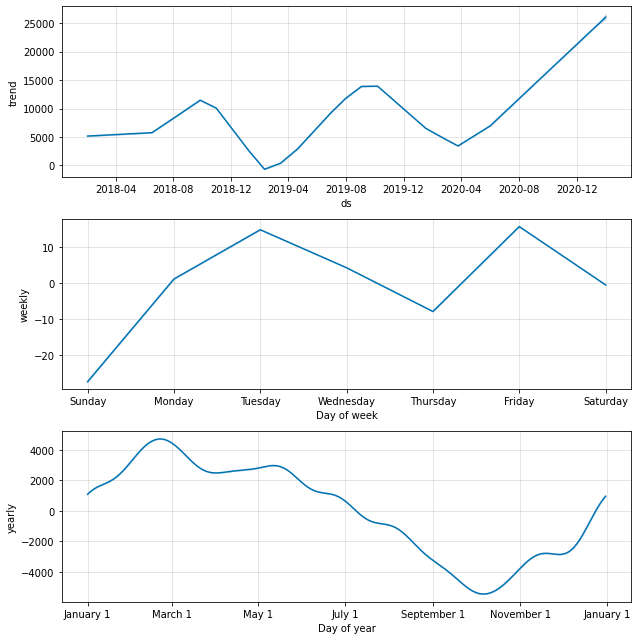

In [12]:
model.plot_components(forecast);

In [13]:
cv_results = cross_validation(model=model, initial=f'{70 * 5} days', horizon='30 days',
                              period='35 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 2019-02-06 00:00:00 and 2020-12-02 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-02-07,3769.824341,3286.970078,4239.173205,3385.9700,2019-02-06
1,2019-02-08,3874.644766,3391.517469,4378.574916,3657.4017,2019-02-06
2,2019-02-09,4011.044595,3566.769687,4493.678140,3654.3000,2019-02-06
3,2019-02-10,4129.718132,3677.237546,4603.270028,3681.0517,2019-02-06
4,2019-02-11,4255.919451,3760.217380,4777.689496,3621.0283,2019-02-06
...,...,...,...,...,...,...
595,2020-12-28,15520.476531,14341.061887,16646.234504,27041.8667,2020-12-02
596,2020-12-29,15642.006104,14548.443032,16793.325035,27353.9783,2020-12-02
597,2020-12-30,15724.389927,14575.988633,16846.603787,28886.0400,2020-12-02
598,2020-12-31,15778.887460,14662.847517,16983.123915,28956.2650,2020-12-02


In [15]:
performance_metrics(cv_results)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1.817758e+06,1348.242653,1018.395936,0.105094,0.097957,0.550000
1,4 days,1.951466e+06,1396.948893,1073.665156,0.113442,0.103936,0.533333
2,5 days,2.028630e+06,1424.299853,1090.872045,0.117694,0.101769,0.516667
3,6 days,2.024949e+06,1423.006893,1108.833551,0.122994,0.102770,0.466667
4,7 days,2.106948e+06,1451.533109,1155.894222,0.129968,0.106201,0.400000
5,8 days,2.286344e+06,1512.066290,1220.465491,0.139364,0.109607,0.400000
6,9 days,2.509231e+06,1584.055311,1288.272951,0.148967,0.118907,0.383333
7,10 days,2.674268e+06,1635.318982,1333.741319,0.157168,0.125096,0.383333
8,11 days,2.999742e+06,1731.976272,1407.470909,0.166744,0.142500,0.333333
9,12 days,3.343641e+06,1828.562618,1493.735816,0.176231,0.149000,0.316667


# Augmento Model

## BTC_TALK

In [16]:
augmento_df = df

In [17]:
augmento_df

,ds,y,BTC_score,twitter_score,reddit_score
0,2018-02-01,9052.5763,0.496911,0.569701,0.429601
1,2018-02-02,8827.6300,0.479340,0.552322,0.430662
2,2018-02-03,9224.3913,0.495011,0.585380,0.453424
3,2018-02-04,8186.6488,0.499830,0.554089,0.444839
4,2018-02-05,6914.2600,0.469328,0.529476,0.438090
...,...,...,...,...,...
1091,2021-01-27,30425.3933,0.451524,0.568092,0.512576
1092,2021-01-28,33420.0450,0.461012,0.588805,0.541803
1093,2021-01-29,34264.0100,0.497264,0.614617,0.575444
1094,2021-01-30,34324.2717,0.490272,0.562461,0.525758


In [18]:
augmento_df_train  = df.iloc[:1066]
augmento_df_test = df.iloc[1066:]

In [19]:
augmento_model = Prophet()
augmento_model.add_regressor('BTC_score')
augmento_model.fit(augmento_df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
augmento_horizon = 30
augmento_future = augmento_model.make_future_dataframe(augmento_horizon)
augmento_future["BTC_score"] = augmento_df["BTC_score"]
augmento_forecast = augmento_model.predict(augmento_future)

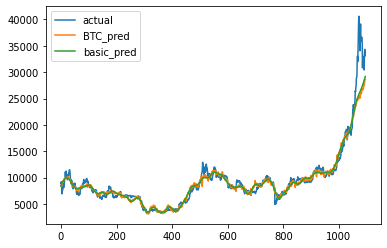

In [21]:
plt.plot(basic_df["y"], label="actual")
plt.plot(augmento_forecast["yhat"], label="BTC_pred")
plt.plot(forecast["yhat"], label="basic_pred")
plt.legend()

check here why is there a break from test plot

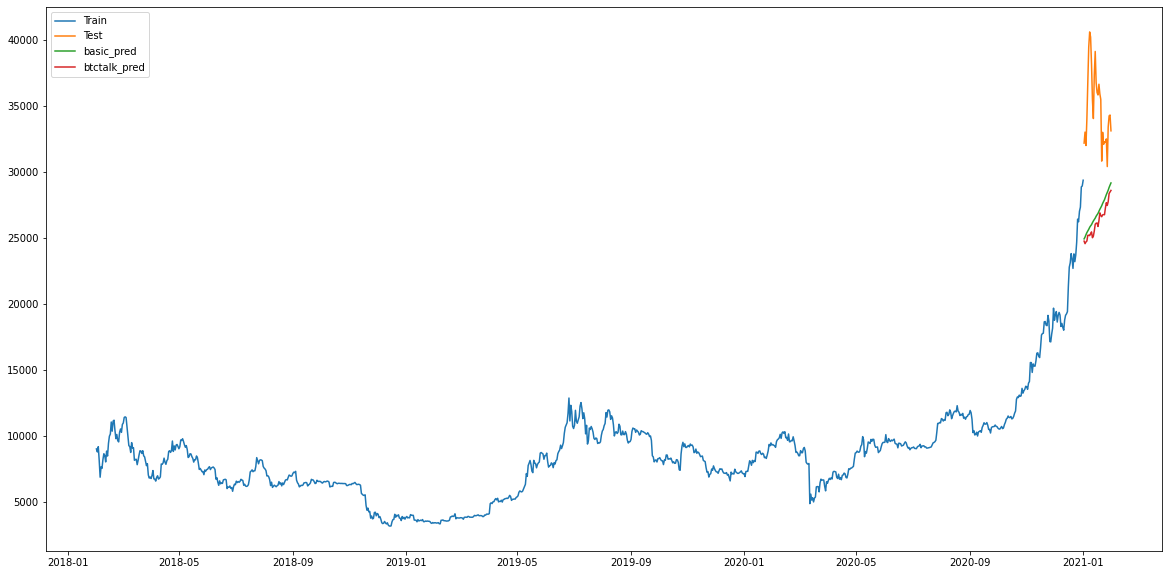

In [22]:
plt.figure(figsize=(20,10))
plt.plot(augmento_df_train['ds'], augmento_df_train['y'], label="Train")
plt.plot(augmento_df_test['ds'], augmento_df_test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="basic_pred")
plt.plot(augmento_forecast[-horizon:]['ds'], augmento_forecast[-horizon:]['yhat'], label="btctalk_pred")
plt.legend(loc="best")

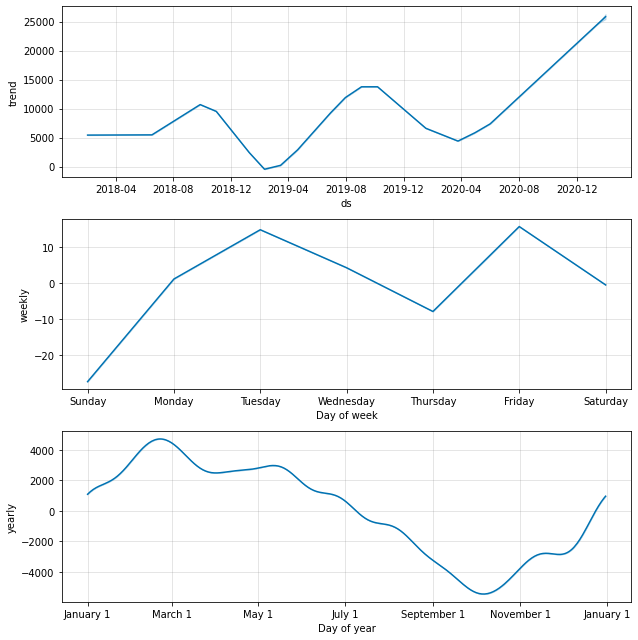

In [23]:
model.plot_components(augmento_forecast);

In [24]:
augmento_cv_results = cross_validation(model=augmento_model, initial=f'{70 * 5} days', horizon='23 days',
                              period='35 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 2019-02-13 00:00:00 and 2020-12-09 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [25]:
performance_metrics(augmento_cv_results)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1.002211e+06,1001.104946,808.470796,0.096148,0.089828,0.534783
1,4 days,1.192340e+06,1091.943401,863.311945,0.102606,0.090297,0.565217
2,5 days,1.383240e+06,1176.112198,926.634743,0.109302,0.094159,0.506522
3,6 days,1.669870e+06,1292.234602,1065.965213,0.124552,0.105387,0.339130
4,7 days,2.291205e+06,1513.672699,1248.452755,0.142413,0.109217,0.269565
5,8 days,3.561043e+06,1887.072483,1460.293188,0.170482,0.121959,0.265217
6,9 days,4.565719e+06,2136.754240,1578.552555,0.185511,0.130433,0.256522
7,10 days,5.210049e+06,2282.553085,1663.098192,0.191188,0.129181,0.250000
8,11 days,5.735934e+06,2394.980944,1756.373006,0.201220,0.137992,0.228261
9,12 days,5.741912e+06,2396.228719,1764.460908,0.204019,0.141606,0.206522


## Twitter

In [26]:
twitter_model = Prophet()
twitter_model.add_regressor('twitter_score')
twitter_model.fit(augmento_df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
augmento_horizon = 30
twitter_future = twitter_model.make_future_dataframe(augmento_horizon)
twitter_future["twitter_score"] = augmento_df["BTC_score"]
twitter_forecast = twitter_model.predict(twitter_future)

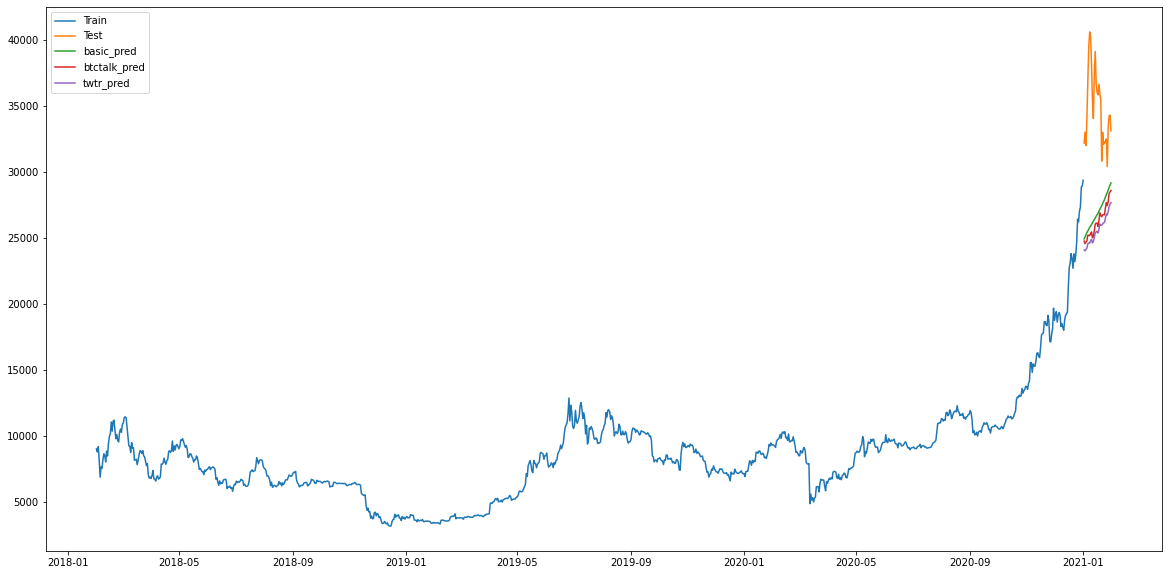

In [28]:
plt.figure(figsize=(20,10))
plt.plot(augmento_df_train['ds'], augmento_df_train['y'], label="Train")
plt.plot(augmento_df_test['ds'], augmento_df_test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="basic_pred")
plt.plot(augmento_forecast[-horizon:]['ds'], augmento_forecast[-horizon:]['yhat'], label="btctalk_pred")
plt.plot(twitter_forecast[-horizon:]['ds'], twitter_forecast[-horizon:]['yhat'], label="twtr_pred")

plt.legend(loc="best")

In [29]:
twitter_cv_results = cross_validation(model=twitter_model, initial=f'{70 * 5} days', horizon='23 days',
                              period='35 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 2019-02-13 00:00:00 and 2020-12-09 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [30]:
performance_metrics(twitter_cv_results)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1.142355e+06,1068.810165,857.133503,0.103548,0.081389,0.550000
1,4 days,1.264098e+06,1124.321032,889.979457,0.107010,0.078572,0.528261
2,5 days,1.459489e+06,1208.093195,978.209498,0.117328,0.102106,0.441304
3,6 days,1.620489e+06,1272.984314,1075.808694,0.127438,0.100023,0.413043
4,7 days,2.264770e+06,1504.915168,1234.635599,0.141618,0.113206,0.350000
5,8 days,3.576670e+06,1891.208507,1429.708403,0.164300,0.121885,0.319565
6,9 days,4.595981e+06,2143.823977,1527.917527,0.172602,0.129576,0.336957
7,10 days,5.197914e+06,2279.893467,1580.108294,0.175654,0.119792,0.350000
8,11 days,5.607264e+06,2367.966214,1664.800680,0.184883,0.135885,0.306522
9,12 days,5.577957e+06,2361.769935,1690.285747,0.191161,0.143839,0.241304


## reddit

In [31]:
reddit_model = Prophet()
reddit_model.add_regressor('reddit_score')
reddit_model.fit(augmento_df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
augmento_horizon = 30
reddit_future = reddit_model.make_future_dataframe(augmento_horizon)
reddit_future["reddit_score"] = augmento_df["reddit_score"]
reddit_forecast = reddit_model.predict(reddit_future)

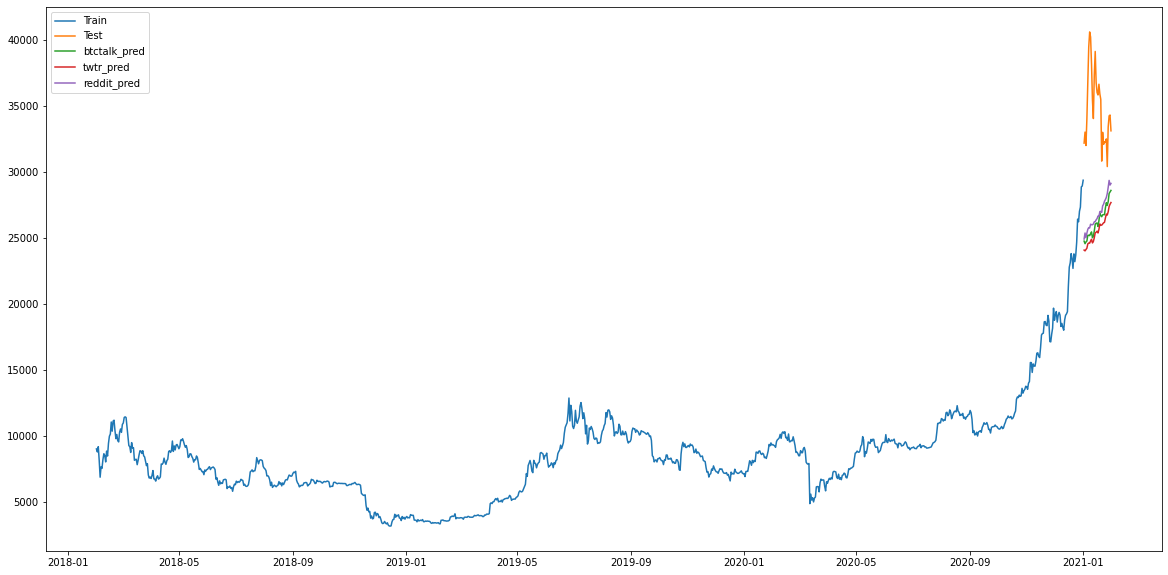

In [33]:
plt.figure(figsize=(20,10))
plt.plot(augmento_df_train['ds'], augmento_df_train['y'], label="Train")
plt.plot(augmento_df_test['ds'], augmento_df_test['y'], label="Test")
#plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="basic_pred")
plt.plot(augmento_forecast[-horizon:]['ds'], augmento_forecast[-horizon:]['yhat'], label="btctalk_pred")
plt.plot(twitter_forecast[-horizon:]['ds'], twitter_forecast[-horizon:]['yhat'], label="twtr_pred")
plt.plot(reddit_forecast[-horizon:]['ds'], reddit_forecast[-horizon:]['yhat'], label="reddit_pred")
plt.legend(loc="best")

In [34]:
reddit_cv_results = cross_validation(model=reddit_model, initial=f'{70 * 5} days', horizon='23 days',
                              period='35 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 2019-02-13 00:00:00 and 2020-12-09 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [35]:
performance_metrics(reddit_cv_results)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1.166027e+06,1079.827529,860.141783,0.103817,0.088580,0.521739
1,4 days,1.388565e+06,1178.373753,929.739382,0.112669,0.096746,0.521739
2,5 days,1.707731e+06,1306.801996,1028.989592,0.121617,0.111342,0.463043
3,6 days,1.953187e+06,1397.564817,1142.565108,0.131812,0.116606,0.391304
4,7 days,2.428743e+06,1558.442622,1290.492213,0.146395,0.132466,0.356522
5,8 days,3.788791e+06,1946.481583,1476.904171,0.173377,0.143835,0.371739
6,9 days,4.815474e+06,2194.418755,1562.078070,0.184499,0.140203,0.393478
7,10 days,5.250605e+06,2291.419884,1575.665505,0.183978,0.104612,0.378261
8,11 days,5.543825e+06,2354.532922,1635.301256,0.190618,0.124609,0.313043
9,12 days,5.629907e+06,2372.742543,1679.339688,0.197987,0.136111,0.306522


## all

In [36]:
final_model = Prophet()

final_model.add_regressor('BTC_score')
final_model.add_regressor('twitter_score')
final_model.add_regressor('reddit_score')

final_model.fit(augmento_df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
augmento_horizon = 30
final_model_future = twitter_model.make_future_dataframe(augmento_horizon)

final_model_future["BTC_score"] = augmento_df["BTC_score"] 
final_model_future["twitter_score"] = augmento_df["twitter_score"] 
final_model_future["reddit_score"] = augmento_df["reddit_score"] 
final_forecast = final_model.predict(final_model_future)

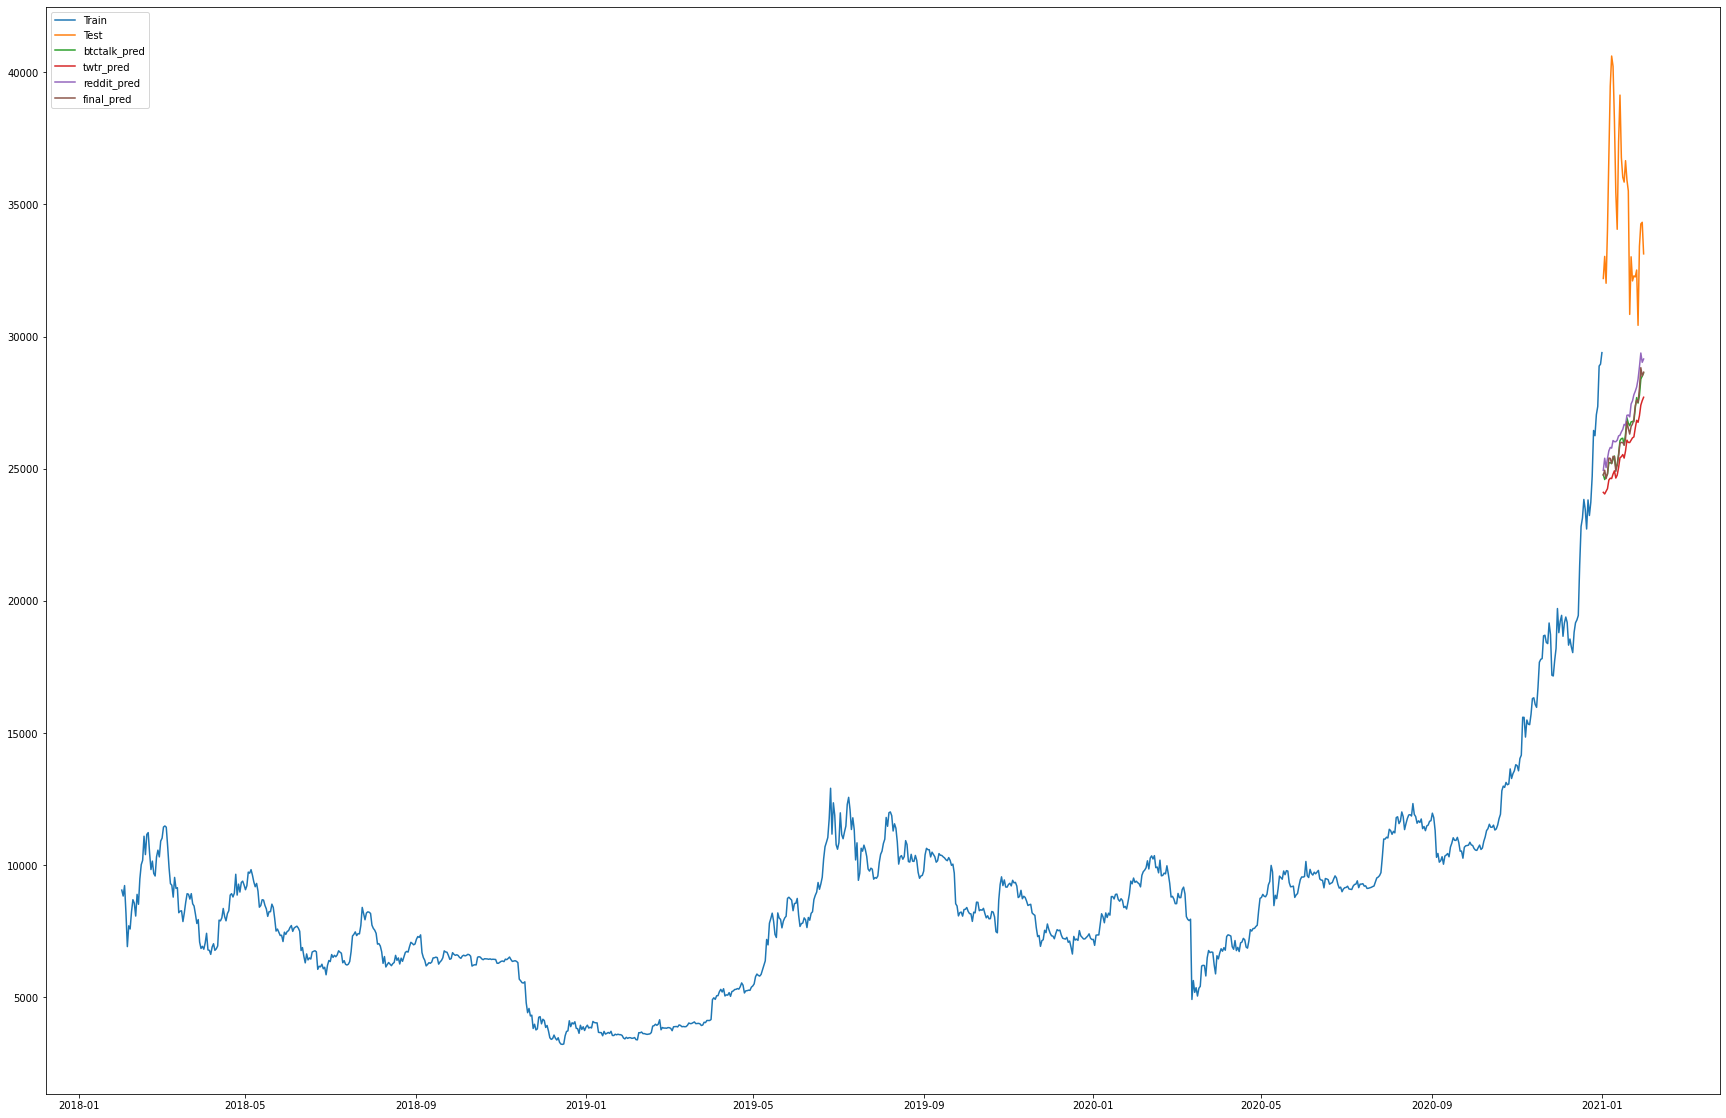

In [38]:
plt.figure(figsize=(30,20))
plt.plot(augmento_df_train['ds'], augmento_df_train['y'], label="Train")
plt.plot(augmento_df_test['ds'], augmento_df_test['y'], label="Test")
#plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="basic_pred")
plt.plot(augmento_forecast[-horizon:]['ds'], augmento_forecast[-horizon:]['yhat'], label="btctalk_pred")
plt.plot(twitter_forecast[-horizon:]['ds'], twitter_forecast[-horizon:]['yhat'], label="twtr_pred")
plt.plot(reddit_forecast[-horizon:]['ds'], reddit_forecast[-horizon:]['yhat'], label="reddit_pred")
plt.plot(final_forecast[-horizon:]['ds'], final_forecast[-horizon:]['yhat'], label="final_pred")
plt.legend(loc="best")

In [39]:
final_cv_results = cross_validation(model=final_model, initial=f'{70 * 5} days', horizon='23 days',
                              period='35 days')


INFO:fbprophet:Making 20 forecasts with cutoffs between 2019-02-13 00:00:00 and 2020-12-09 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [40]:
performance_metrics(final_cv_results)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,9.019588e+05,949.715102,741.142964,0.089685,0.062084,0.571739
1,4 days,1.003054e+06,1001.525716,769.151568,0.092966,0.062084,0.615217
2,5 days,1.193756e+06,1092.591588,855.412849,0.102485,0.087377,0.534783
3,6 days,1.435816e+06,1198.255477,996.392308,0.117326,0.095780,0.367391
4,7 days,1.951952e+06,1397.122818,1162.778888,0.133472,0.109430,0.247826
5,8 days,3.064022e+06,1750.434661,1339.211405,0.156158,0.110861,0.271739
6,9 days,4.023262e+06,2005.807032,1437.056568,0.165890,0.122294,0.330435
7,10 days,4.585795e+06,2141.446837,1489.754576,0.168613,0.118605,0.328261
8,11 days,5.095416e+06,2257.302751,1574.544934,0.177252,0.127079,0.284783
9,12 days,5.124170e+06,2263.662996,1582.785936,0.179656,0.127071,0.300000


# Fear and Greed

In [46]:
fg_df = pd.read_csv("../data/prices_greed_score_clean.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/prices_greed_score_clean.csv'

In [ ]:
df = df.rename(columns={"Unnamed: 0": "ds","price":"y"})
df['ds'] = pd.to_datetime(df['ds'])
df = df.drop_duplicates().reset_index(drop=True)
basic_df = df.drop(columns=["BTC_score","twitter_score","reddit_score"])

In [41]:
final_model = Prophet()

final_model.add_regressor('BTC_score')
final_model.add_regressor('twitter_score')
final_model.add_regressor('reddit_score')

final_model.fit(augmento_df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
augmento_horizon = 30
final_model_future = twitter_model.make_future_dataframe(augmento_horizon)

final_model_future["BTC_score"] = augmento_df["BTC_score"] 
final_model_future["twitter_score"] = augmento_df["twitter_score"] 
final_model_future["reddit_score"] = augmento_df["reddit_score"] 
final_forecast = final_model.predict(final_model_future)

In [43]:
final_cv_results = cross_validation(model=final_model, initial=f'{70 * 5} days', horizon='23 days',
                              period='35 days')


INFO:fbprophet:Making 20 forecasts with cutoffs between 2019-02-13 00:00:00 and 2020-12-09 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [44]:
performance_metrics(final_cv_results)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,9.019588e+05,949.715102,741.142964,0.089685,0.062084,0.578261
1,4 days,1.003054e+06,1001.525716,769.151568,0.092966,0.062084,0.615217
2,5 days,1.193756e+06,1092.591588,855.412849,0.102485,0.087377,0.556522
3,6 days,1.435816e+06,1198.255477,996.392308,0.117326,0.095780,0.389130
4,7 days,1.951952e+06,1397.122818,1162.778888,0.133472,0.109430,0.232609
5,8 days,3.064022e+06,1750.434661,1339.211405,0.156158,0.110861,0.271739
6,9 days,4.023262e+06,2005.807032,1437.056568,0.165890,0.122294,0.367391
7,10 days,4.585795e+06,2141.446837,1489.754576,0.168613,0.118605,0.356522
8,11 days,5.095416e+06,2257.302751,1574.544934,0.177252,0.127079,0.291304
9,12 days,5.124170e+06,2263.662996,1582.785936,0.179656,0.127071,0.300000
